In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip3 install torch torchvision


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
df = pd.read_csv('cfb21.csv.xls')

In [4]:
df.head()


,Unnamed: 0,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,...,Average Time of Possession per Game,Turnover Rank,Fumbles Recovered,Opponents Intercepted,Turnovers Gain,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game
0,1,Air Force (Mountain West),13,10-3,51,947,"5,502",5.81,52,423.2,...,36:35,31,7,8,15,5,4,9,6,0.46
1,2,Akron (MAC),12,2-10,106,783,"4,089",5.22,29,340.8,...,31:08,98,6,6,12,12,5,17,-5,-0.42
2,3,Alabama (SEC),15,13-2,7,"1,119","7,323",6.54,69,488.2,...,31:43,21,7,15,22,6,7,13,9,0.60
3,4,App State (Sun Belt),14,10-4,30,980,"6,178",6.30,55,441.3,...,31:10,91,7,15,22,14,12,26,-4,-0.29
4,5,Arizona (Pac-12),12,1-11,101,870,"4,271",4.91,18,355.9,...,30:13,130,2,4,6,5,18,23,-17,-1.42


In [6]:
df["Average Number of Defensive Plays Per Game"] = df["Def Plays"] // df["Games"]

TypeError: unsupported operand type(s) for //: 'str' and 'int'

In [131]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 152 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    Unnamed: 0                             int64  
 1    Team                                   object 
 2    Games                                  int64  
 3    Win-Loss                               object 
 4    Off Rank                               int64  
 5    Off Plays                              object 
 6    Off Yards                              object 
 7    Off Yards/Play                         float64
 8    Off TDs                                int64  
 9    Off Yards per Game                     float64
 10   Def Rank                               int64  
 11   Def Plays                              object 
 12   Yards Allowed                          object 
 13   Yards/Play Allowed                     float64
 14   Off TDs Allowed                        i

In [149]:
df[['Wins', 'Losses']] = df['Win-Loss'].str.split('-', expand=True).astype(int)
#df.head()
df['Win Percentage'] = ((df['Win'] / df['Games']) * 100).round(2) 
df.drop('Loss', axis = 1)
df.drop('Win', axis = 1)
df.head()


,Unnamed: 0,Team,Games,Win-Loss,Off Rank,Off Plays,Off Yards,Off Yards/Play,Off TDs,Off Yards per Game,...,Fumbles Lost,Interceptions Thrown.y,Turnovers Lost,Turnover Margin,Avg Turnover Margin per Game,Win,Loss,Win Percentage,Wins,Losses
0,1,Air Force (Mountain West),13,10-3,51,947,"5,502",5.81,52,423.2,...,5,4,9,6,0.46,10,3,76.92,10,3
1,2,Akron (MAC),12,2-10,106,783,"4,089",5.22,29,340.8,...,12,5,17,-5,-0.42,2,10,16.67,2,10
2,3,Alabama (SEC),15,13-2,7,"1,119","7,323",6.54,69,488.2,...,6,7,13,9,0.60,13,2,86.67,13,2
3,4,App State (Sun Belt),14,10-4,30,980,"6,178",6.30,55,441.3,...,14,12,26,-4,-0.29,10,4,71.43,10,4
4,5,Arizona (Pac-12),12,1-11,101,870,"4,271",4.91,18,355.9,...,5,18,23,-17,-1.42,1,11,8.33,1,11


In [133]:
df.isnull().sum()

Unnamed: 0                      0
Team                            0
Games                           0
Win-Loss                        0
Off Rank                        0
                               ..
Turnover Margin                 0
Avg Turnover Margin per Game    0
Win                             0
Loss                            0
Win Percentage                  0
Length: 155, dtype: int64

<Axes: xlabel='Def Rank', ylabel='Win'>

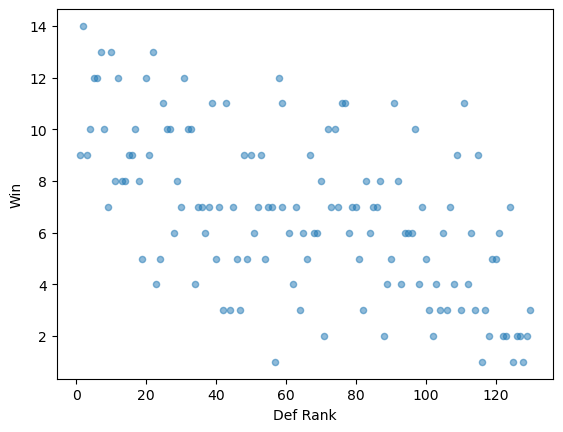

In [141]:
df.plot.scatter(x='Def Rank', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Sacks', ylabel='Win Percentage'>

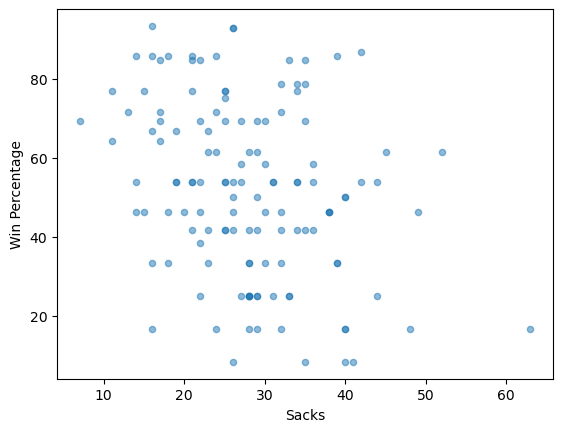

In [150]:
df.plot.scatter(x='Sacks', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Sack Rank', ylabel='Win Percentage'>

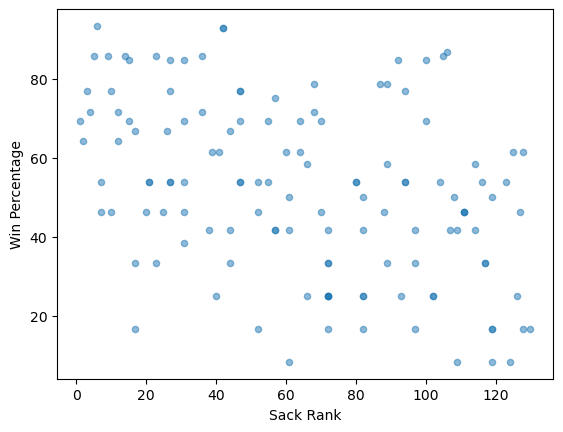

In [152]:
df.plot.scatter(x='Sack Rank', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Rushing Def Rank', ylabel='Win Percentage'>

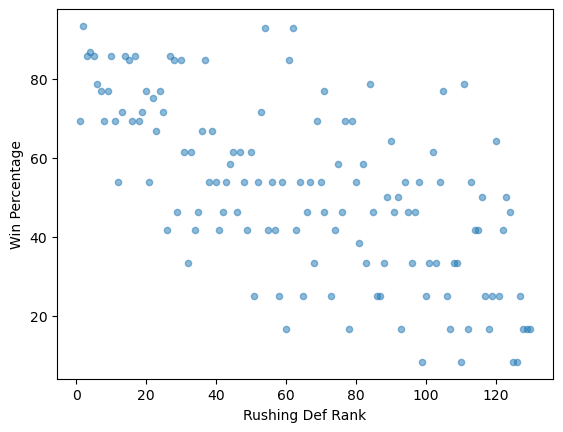

In [153]:
df.plot.scatter(x='Rushing Def Rank', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Redzone Points Allowed', ylabel='Win Percentage'>

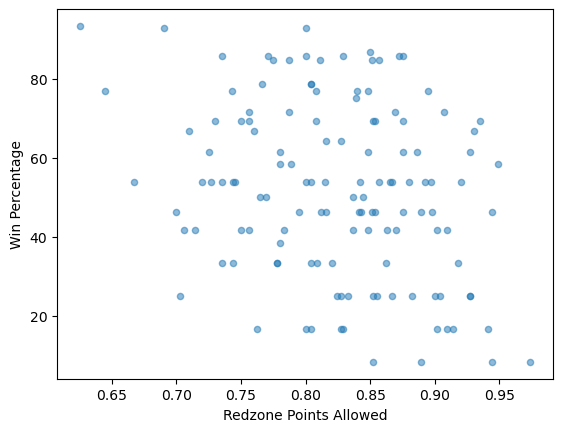

In [154]:
df.plot.scatter(x='Redzone Points Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Redzone Def Rank', ylabel='Win Percentage'>

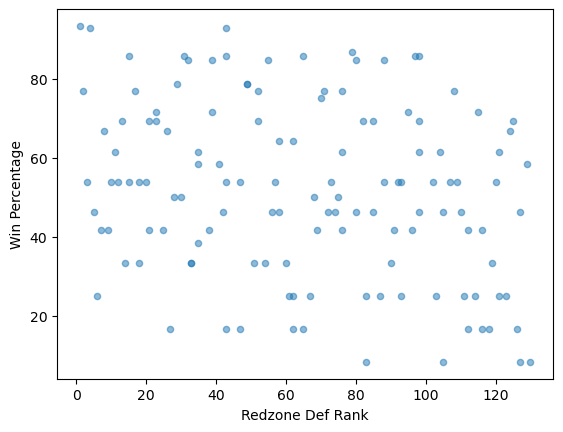

In [155]:
df.plot.scatter(x='Redzone Def Rank', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Pass Yards Per Game Allowed', ylabel='Win Percentage'>

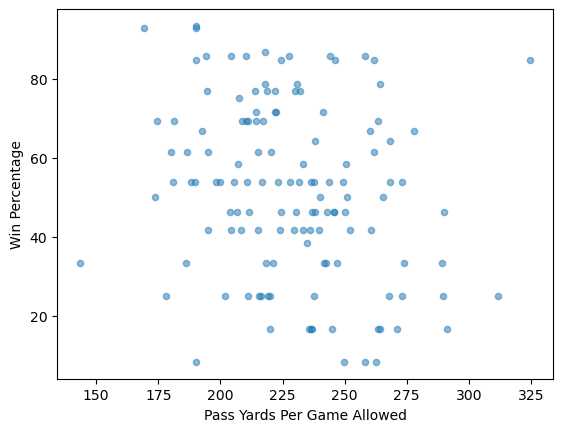

In [156]:
df.plot.scatter(x='Pass Yards Per Game Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Yards/Completion Allowed', ylabel='Win Percentage'>

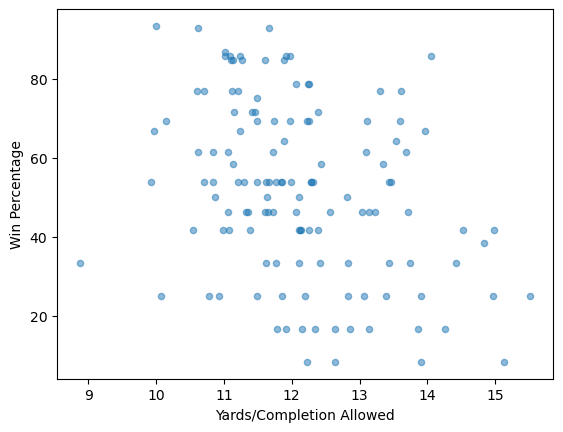

In [157]:
df.plot.scatter(x='Yards/Completion Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Yards/Attempt Allowed', ylabel='Win Percentage'>

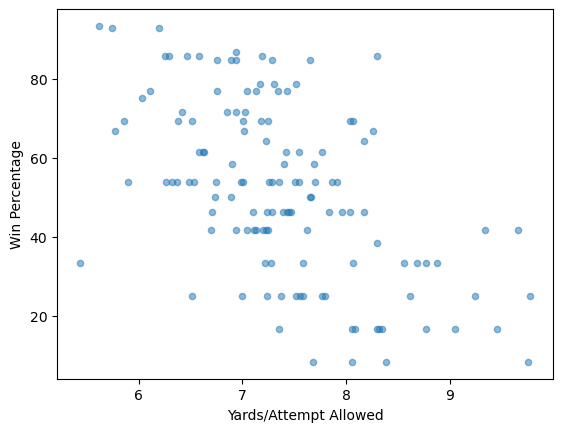

In [158]:
df.plot.scatter(x='Yards/Attempt Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Opp Pass TDs Allowed', ylabel='Win Percentage'>

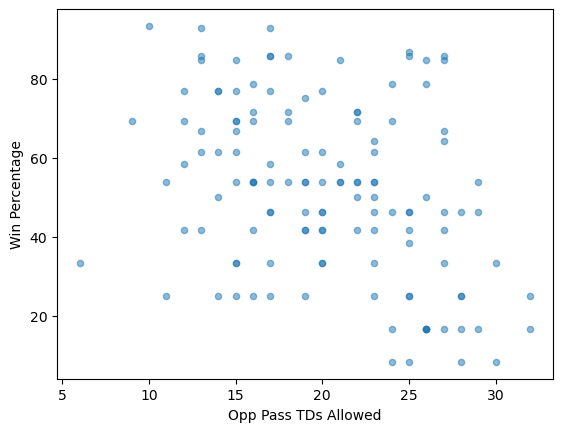

In [159]:
df.plot.scatter(x='Opp Pass TDs Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Opp Pass Yds Allowed', ylabel='Win Percentage'>

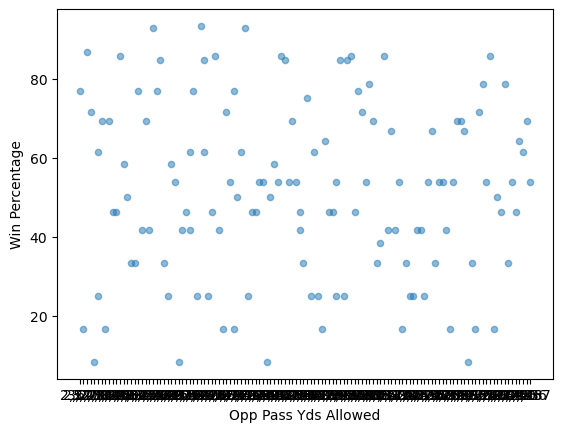

In [162]:
df.plot.scatter(x='Opp Pass Yds Allowed', y = 'Win Percentage', alpha = 0.5)


<Axes: xlabel='Opp Completions Allowed', ylabel='Win Percentage'>

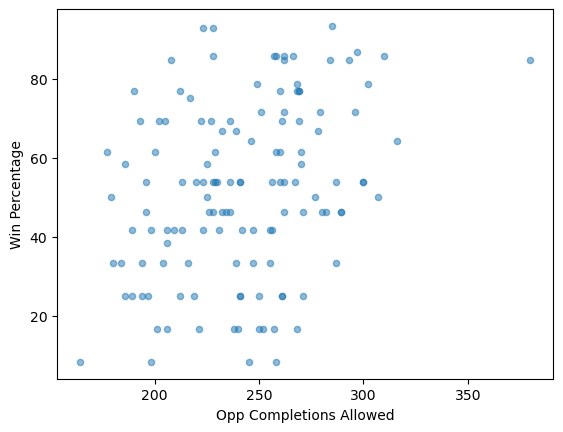

In [163]:
df.plot.scatter(x='Opp Completions Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Pass Def Rank', ylabel='Win Percentage'>

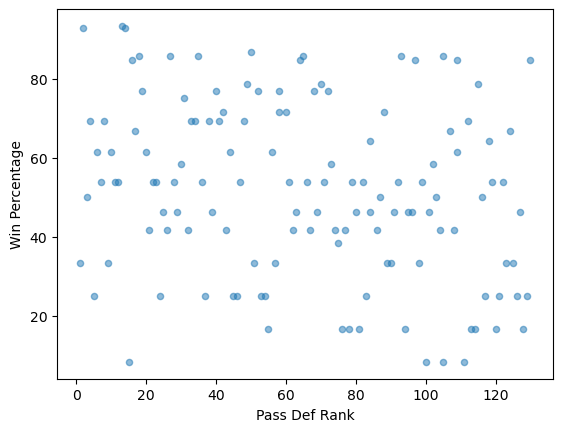

In [164]:
df.plot.scatter(x='Pass Def Rank', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='4rd Down Def Rank', ylabel='Win Percentage'>

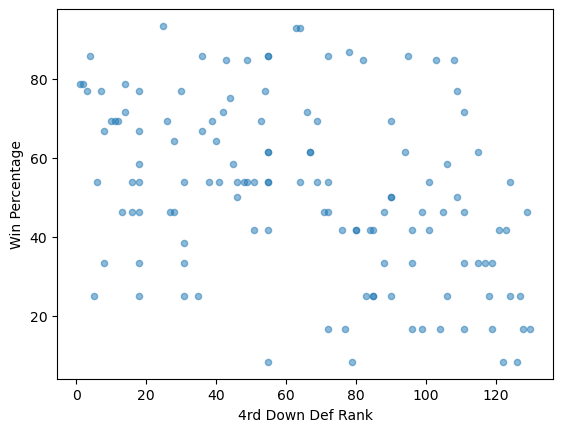

In [168]:
df.plot.scatter(x='4rd Down Def Rank', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='First Down Def Rank', ylabel='Win Percentage'>

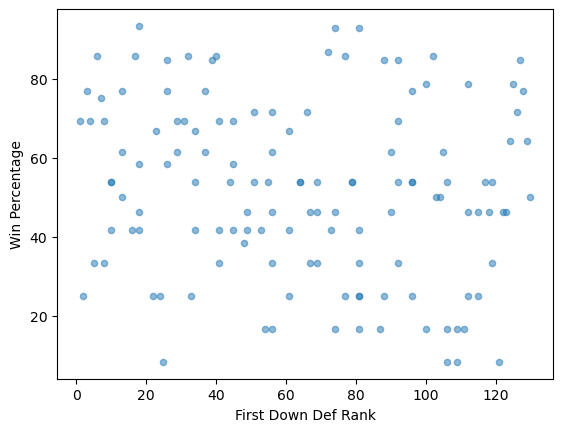

In [169]:
df.plot.scatter(x='First Down Def Rank', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Yards Per Game Allowed', ylabel='Win Percentage'>

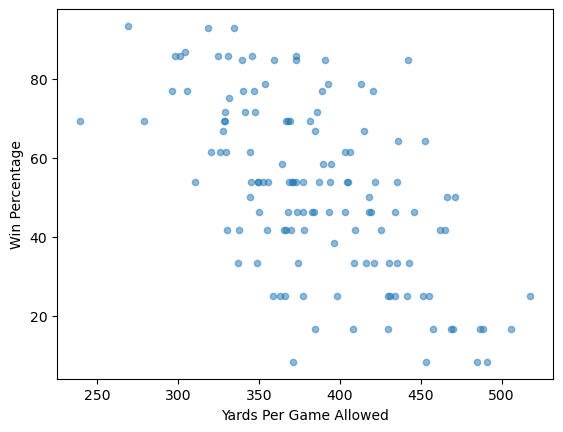

In [170]:
df.plot.scatter(x='Yards Per Game Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Off TDs Allowed', ylabel='Win Percentage'>

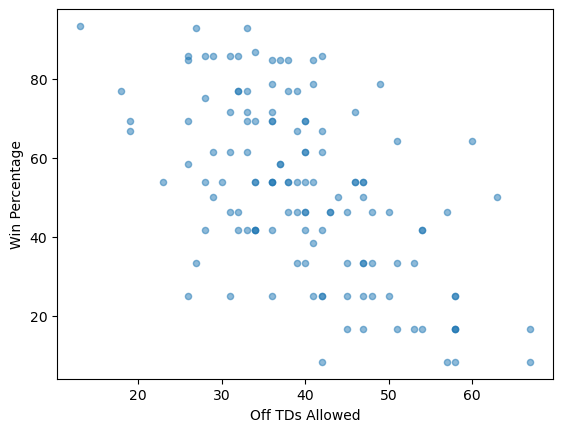

In [171]:
df.plot.scatter(x='Off TDs Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Yards/Play Allowed', ylabel='Win Percentage'>

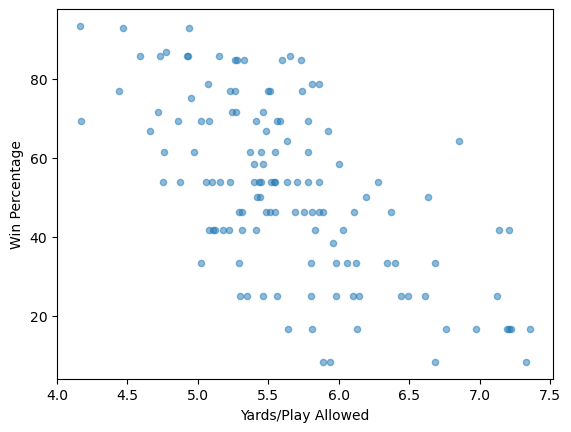

In [172]:
df.plot.scatter(x='Yards/Play Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Yards Allowed', ylabel='Win Percentage'>

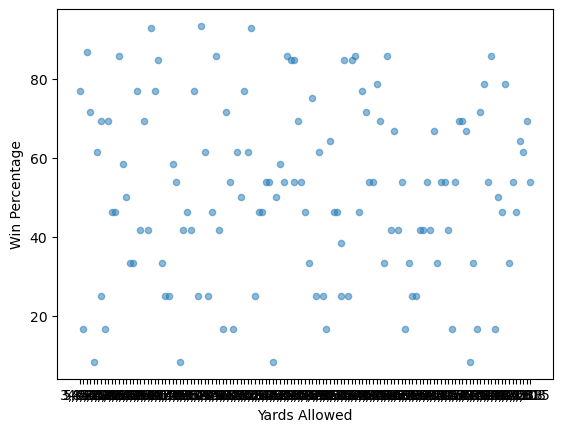

In [173]:
df.plot.scatter(x='Yards Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Def Plays', ylabel='Win Percentage'>

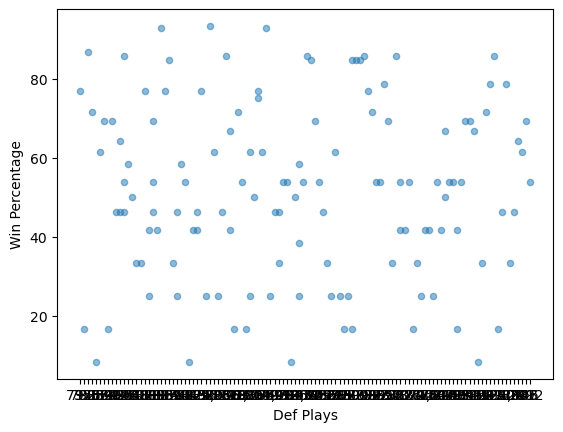

In [174]:
df.plot.scatter(x='Def Plays', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Opponents Intercepted', ylabel='Win Percentage'>

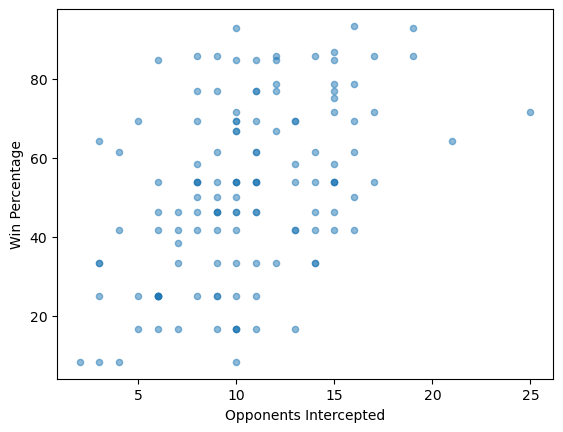

In [175]:
df.plot.scatter(x='Opponents Intercepted', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Fumbles Recovered', ylabel='Win Percentage'>

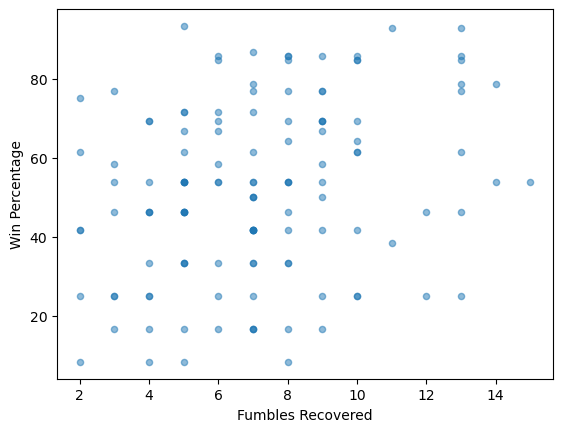

In [176]:
df.plot.scatter(x='Fumbles Recovered', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='3rd Down Def Rank', ylabel='Win Percentage'>

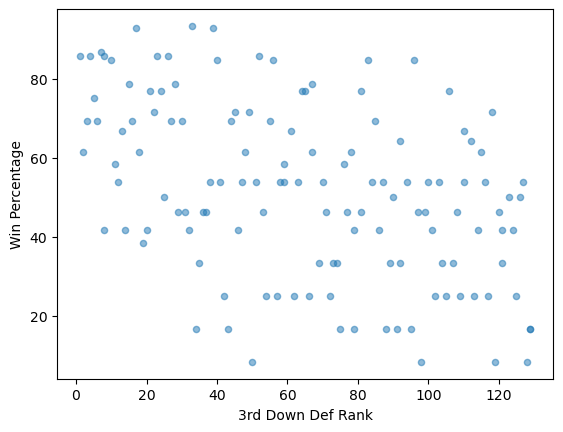

In [177]:
df.plot.scatter(x='3rd Down Def Rank', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Tackle For Loss Per Game', ylabel='Win Percentage'>

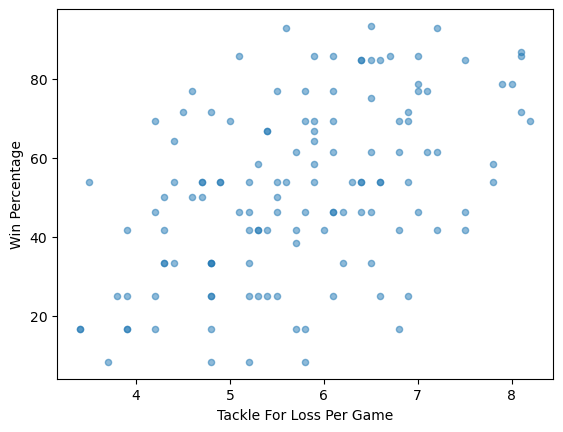

In [178]:
df.plot.scatter(x='Tackle For Loss Per Game', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Total Tackle For Loss', ylabel='Win Percentage'>

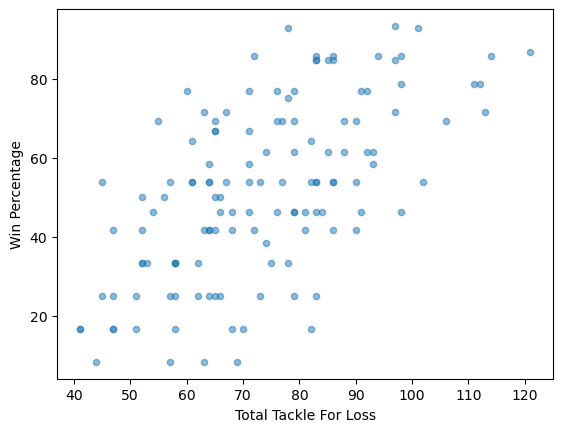

In [180]:
df.plot.scatter(x='Total Tackle For Loss', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Tackle for Loss Yards', ylabel='Win Percentage'>

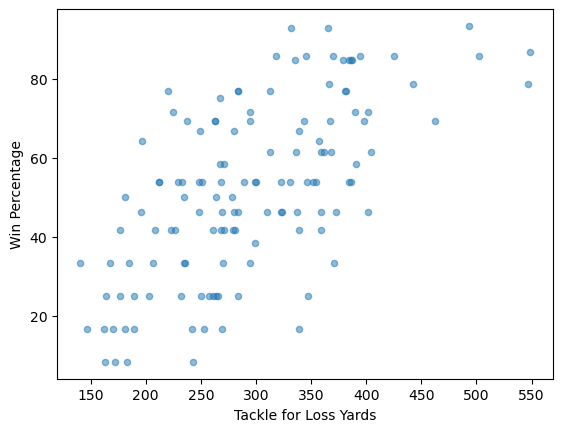

In [181]:
df.plot.scatter(x='Tackle for Loss Yards', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Assist Tackle For Loss', ylabel='Win Percentage'>

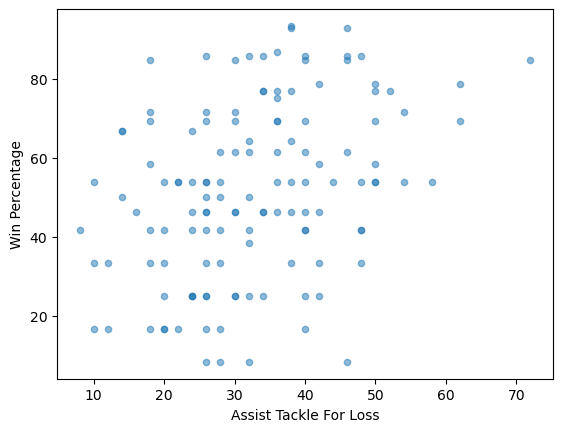

In [184]:
df.plot.scatter(x='Assist Tackle For Loss', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Solo Tackle For Loss', ylabel='Win Percentage'>

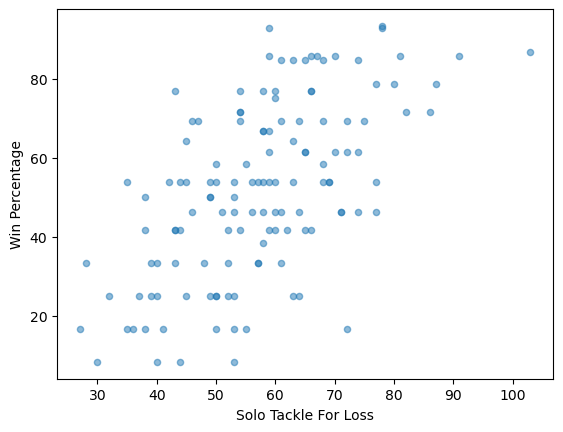

In [185]:
df.plot.scatter(x='Solo Tackle For Loss', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Tackle for Loss Rank', ylabel='Win Percentage'>

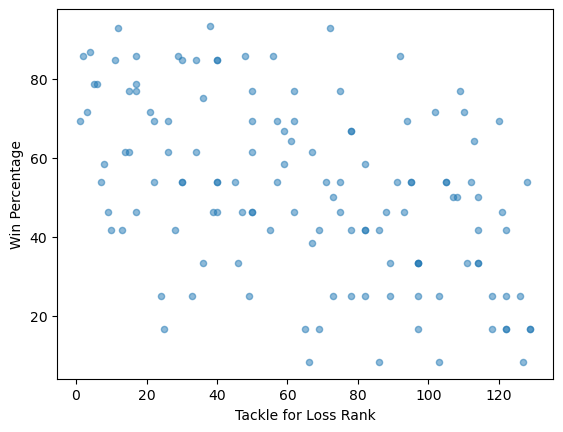

In [186]:
df.plot.scatter(x='Tackle for Loss Rank', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Avg Points per Game Allowed', ylabel='Win Percentage'>

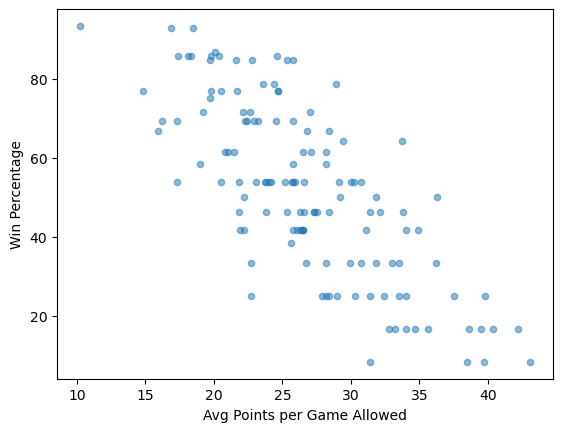

In [187]:
df.plot.scatter(x='Avg Points per Game Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Points Allowed', ylabel='Win Percentage'>

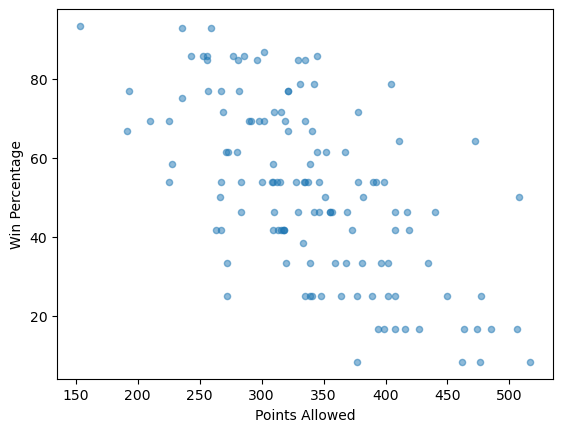

In [188]:
df.plot.scatter(x='Points Allowed', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Scoring Def Rank', ylabel='Win Percentage'>

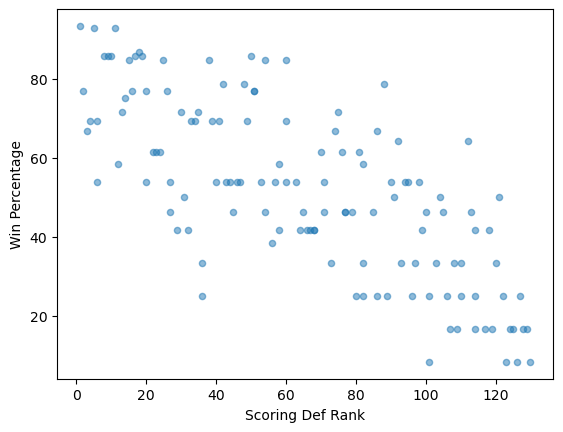

In [189]:
df.plot.scatter(x='Scoring Def Rank', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Average Sacks per Game', ylabel='Win Percentage'>

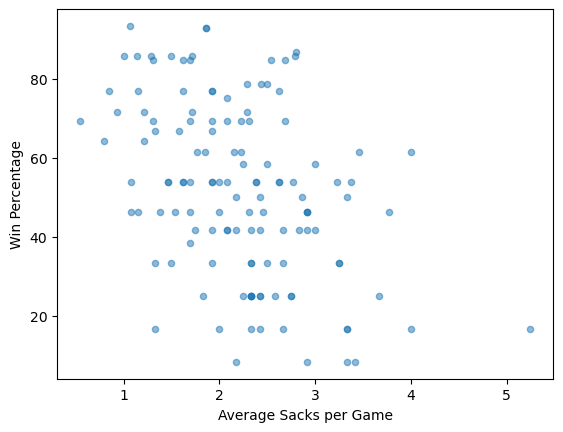

In [190]:
df.plot.scatter(x='Average Sacks per Game', y = 'Win Percentage', alpha = 0.5)

<Axes: xlabel='Sack Yards', ylabel='Win Percentage'>

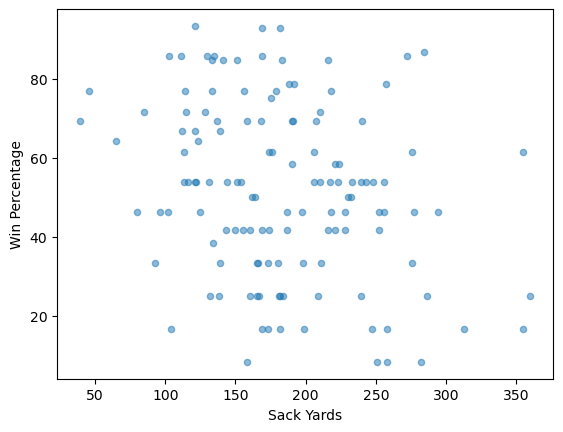

In [191]:
df.plot.scatter(x='Sack Yards', y = 'Win Percentage', alpha = 0.5)